# 1. 데이터 수집하기

In [1]:
import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", 
    filename="./data/news_summary_more.csv")

('./data/news_summary_more.csv', <http.client.HTTPMessage at 0x7f5f6c3a2f40>)

In [2]:
import pandas as pd

data = pd.read_csv('./data/news_summary_more.csv', encoding='iso-8859-1')

data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


# 2. 데이터 전처리하기 (추상적 요약)

## 2-1. 데이터 중복 유무 확인

In [3]:
print(f'Text 열에서 중복을 배제한 유일한 샘플의 수 : {data["text"].nunique()}')
print(f'Headlines 열에서 중복을 배제한 유일한 샘플의 수 : {data["headlines"].nunique()}')

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
Headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [4]:
data.drop_duplicates(subset=['text'], inplace=True)
print(f'전체 샘플수 : {len(data)}')

전체 샘플수 : 98360


## 2-2. 결측치 처리

In [5]:
print(data.isnull().sum())

# 현재 결측값이 없으므로 생략함
# data.dropna(axis=0, inplace=True)

headlines    0
text         0
dtype: int64


## 2-3. 텍스트 정규화와 불용어 제거

In [6]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print(f'정규화 사전의 수 : {len(contractions)}')

정규화 사전의 수 : 120


In [7]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

print(f'불용어 개수 : {len(stopwords.words("english"))}')

불용어 개수 : 179


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
import re
from bs4 import BeautifulSoup 


def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [9]:
data['text'] = data['text'].apply(lambda it: preprocess_sentence(it))
data['headlines'] = data['headlines'].apply(lambda it: preprocess_sentence(it, False))

In [10]:
import numpy as np

data.replace('', np.nan, inplace=True)
data.isnull().sum()

headlines    0
text         0
dtype: int64

## 2-4. 샘플의 최대 길이 정하기

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.299532330215534


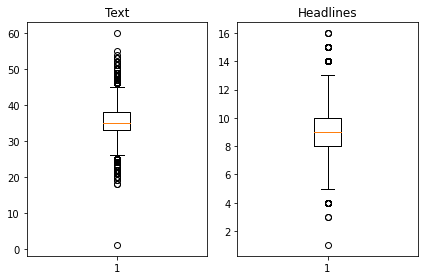

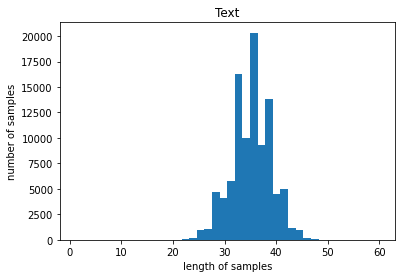

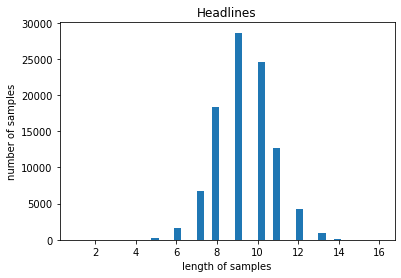

In [11]:
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
# 최대 길이를 (평균 + 2*표준편차)로 계산
def calc_max_len(_len):
    return round(np.mean(_len) + 2 * np.std(_len))

text_max_len = calc_max_len(text_len)
headlines_max_len = calc_max_len(headlines_len)

print(f'text_max_len : {text_max_len}')
print(f'headlines_max_len : {headlines_max_len}')

text_max_len : 43
headlines_max_len : 12


In [13]:
def below_threshold_len(max_len, nested_list):
    _list = list(filter(lambda it: len(it.split()) <= max_len, nested_list))
    print(f'전체 샘플 중 길이가 {max_len} 이하인 샘플의 비율: {len(_list)/len(nested_list)}')

In [14]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 43 이하인 샘플의 비율: 0.9871797478649857
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9880337535583571


In [15]:
# max_len 보다 긴 샘플 제거
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]

In [16]:
print(f'전체 샘플수 : {len(data)}')

전체 샘플수 : 95935


## 2-5. 시작 토큰과 종료 토큰 추가하기

In [17]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')

data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
6,india get all out for their lowest odi total i...,india recorded lowest odi total new zealand ge...,sostoken india get all out for their lowest od...,india get all out for their lowest odi total i...


In [18]:
encoder_input = np.array(data['text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

## 2-6. 훈련 데이터, 테스트 데이터 분리

In [19]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

indices

array([77628, 69943, 38660, ...,  2418, 21297, 85526])

In [20]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [21]:
n_of_val = int(len(encoder_input) * 0.2)
print(f'테스트 데이터의 수 : {n_of_val}')

테스트 데이터의 수 : 19187


In [22]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print(f'훈련 데이터의 개수 : {len(encoder_input_train)}')
print(f'훈련 레이블의 개수 : {len(decoder_input_train)}')
print(f'테스트 데이터의 개수 : {len(encoder_input_test)}')
print(f'테스트 레이블의 개수 : {len(decoder_input_test)}')

훈련 데이터의 개수 : 76748
훈련 레이블의 개수 : 76748
테스트 데이터의 개수 : 19187
테스트 레이블의 개수 : 19187


## 2-6. 단어 집합(vocabulary) 만들기 및 정수 인코딩

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences


def check_vocabulary(input_train, threshold=7):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(input_train)
    
    threshold = threshold
    total_cnt = len(tokenizer.word_index) # 단어의 수
    rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
    total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
    rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

    # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
    for key, value in tokenizer.word_counts.items():
        total_freq = total_freq + value

        # 단어의 등장 빈도수가 threshold보다 작으면
        if(value < threshold):
            rare_cnt = rare_cnt + 1
            rare_freq = rare_freq + value

    print('단어 집합(vocabulary)의 크기 :', total_cnt)
    print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
    print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
    print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
    print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [24]:
check_vocabulary(encoder_input_train, threshold=7)

단어 집합(vocabulary)의 크기 : 68430
등장 빈도가 6번 이하인 희귀 단어의 수: 46616
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 21814
단어 집합에서 희귀 단어의 비율: 68.12216863948561
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.5383660852861225


In [25]:
src_vocab = 22000

src_tokenizer = Tokenizer(num_words=src_vocab)
src_tokenizer.fit_on_texts(decoder_input_train)

encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [26]:
check_vocabulary(decoder_input_train, threshold=6)

단어 집합(vocabulary)의 크기 : 29748
등장 빈도가 5번 이하인 희귀 단어의 수: 19471
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10277
단어 집합에서 희귀 단어의 비율: 65.45313970687106
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.744963457260884


In [27]:
tar_vocab = 10000

tar_tokenizer = Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [28]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print(f'삭제할 훈련 데이터의 개수 : {len(drop_train)}')
print(f'삭제할 테스트 데이터의 개수 : {len(drop_test)}')

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print(f'훈련 데이터의 개수 : {len(encoder_input_train)}')
print(f'훈련 레이블의 개수 : {len(decoder_input_train)}')
print(f'테스트 데이터의 개수 : {len(encoder_input_test)}')
print(f'테스트 레이블의 개수 : {len(decoder_input_test)}')

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 76747
훈련 레이블의 개수 : 76747
테스트 데이터의 개수 : 19187
테스트 레이블의 개수 : 19187


## 2-7. 패딩하기

In [29]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

# 3. 어텐션 메커니즘 사용하기 (추상적 요약)

## 3-1. 모델 설계

* 기본적인 seq2seq 모델

In [30]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

* 인코더

In [31]:
embedding_dim = 128
hidden_size = 256

encoder_inputs = Input(shape=(text_max_len,))

enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

* 디코더

In [32]:
decoder_inputs = Input(shape=(None,))

dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [33]:
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 43)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 43, 128)      2816000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 43, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

* 어텐션 메커니즘

In [34]:
from tensorflow.keras.layers import AdditiveAttention

attn_layer = AdditiveAttention(name='attention_layer')

attn_out = attn_layer([decoder_outputs, encoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 43)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 43, 128)      2816000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 43, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

## 3-2. 모델 훈련

In [35]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
300/300 [==============================] - 210s 669ms/step - loss: 5.6265 - val_loss: 5.2152
Epoch 2/50
300/300 [==============================] - 198s 659ms/step - loss: 5.0287 - val_loss: 4.7822
Epoch 3/50
300/300 [==============================] - 194s 648ms/step - loss: 4.6886 - val_loss: 4.5283
Epoch 4/50
300/300 [==============================] - 194s 648ms/step - loss: 4.4322 - val_loss: 4.3415
Epoch 5/50
300/300 [==============================] - 196s 653ms/step - loss: 4.2305 - val_loss: 4.2045
Epoch 6/50
300/300 [==============================] - 198s 659ms/step - loss: 4.0666 - val_loss: 4.0957
Epoch 7/50
300/300 [==============================] - 195s 651ms/step - loss: 3.9266 - val_loss: 4.0195
Epoch 8/50
300/300 [==============================] - 194s 646ms/step - loss: 3.8051 - val_loss: 3.9442
Epoch 9/50
300/300 [==============================] - 194s 645ms/step - loss: 3.6978 - val_loss: 3.8887
Epoch 10/50
300/300 [==============================] - 192s 641m

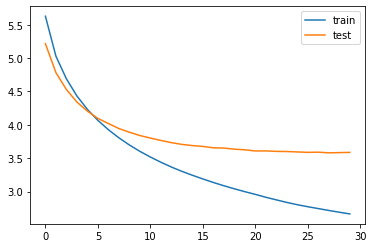

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 3-3. 인퍼런스 모델 구현하기

In [37]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [38]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [39]:
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [40]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

# 4. 실제 결과와 요약문 비교하기 (추상적 요약)

In [41]:
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [43]:
import random

sample_index = random.randint(1, len(encoder_input_test))

print(sample_index)

3491


In [46]:
for i in range(sample_index, sample_index + 5):
    print(f'원문 : {seq2text(encoder_input_test[i])}')
    print(f'실제 요약 : {seq2summary(decoder_input_test[i])}')
    print(f'추상적 요약 : {decode_sequence(encoder_input_test[i].reshape(1, text_max_len))}')
    print('\n')

원문 : jack co founder chairman chinese commerce giant alibaba said came business field accident english teacher founding alibaba co founders said misses teaching much billionaire retire monday th birthday focus philanthropy education 
실제 요약 : came into business field by accident alibaba jack ma 
추상적 요약 :  jack ma is the biggest person jack ma


원문 : responding former jammu kashmir chief minister farooq abdullah statement pakistan occupied kashmir belongs pakistan actor rishi kapoor tweeted totally agree sir pok rishi said way solve issue adding wants see pakistan dies 
실제 요약 : ours and pok is pakistan rishi to ex cm farooq 
추상적 요약 :  pak cm calls pak cm imran khan over remark


원문 : juventus sporting director revealed cristiano ronaldo crazy bicycle kick goal triggered million transfer talks said ronaldo agent told cristiano stunned attention said one day would like come juventus juventus president told go ahead see really opportunity added 
실제 요약 : ronaldo crazy goal against us started

# 5. Summa을 이용해서 추출적 요약해보기

In [47]:
text = pd.read_csv('./data/news_summary_more.csv', encoding='iso-8859-1')

text.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [57]:
from summa.summarizer import summarize

for i in range(sample_index, sample_index + 5):
    print(f'원문 : {text["text"][i]}')
    print(f'실제 요약 : {text["headlines"][i]}')
    print(f'추출적 요약 : {summarize(text["text"][i], ratio=0.35)}')
    print('\n')

원문 : Addressing the controversy surrounding the release date of 'Thackeray', the biopic on Shiv Sena founder Bal Thackeray, Aamir Khan said, there's no bigger star than Balasaheb in Maharashtra. "It's obvious that no other filmmaker will screen their film on the same day," Aamir added. Reports earlier suggested the release dates of several films were changed to avoid clashing with 'Thackeray'.
실제 요약 : No bigger star than Balasaheb: Aamir on Thackeray release row
추출적 요약 : Reports earlier suggested the release dates of several films were changed to avoid clashing with 'Thackeray'.


원문 : Speaking about the controversy surrounding his upcoming film 'The Accidental Prime Minister', actor Akshaye Khanna said, "Any subject like this is bound to create a little...controversy." "I'd be surprised if it didn't happen. (That means) something is wrong," the actor added. Akshaye plays the role of former Prime Minister Manmohan Singh's media adviser Sanjaya Baru in the movie.
실제 요약 : Bound to create

# 6. Conclusion

> * Extractive summarization
> 본문에서 중요한 문장을 추출해 요약하는 방식, 본문에서 중요한 문장을 선택해 그대로 요약하기 때문에 본문에서 수집한 정보를 왜곡하지 않고 좋은 성능을 발휘한다. 그러나, 추출한 문장들을 직접 이어 붙인 것이기 때문에 문장 구조나 문맥이 불완전하여 읽기 어려울 수 있음.

> * Abstractive summarization
> 본문의 내용을 이해하고 새로운 문장을 생성해 요약하는 방식, 정보를 왜곡하지 않으면서도 요약 문장을 더욱 자연스럽게 만들어준다. 그러나, 직접 생성하는 과정이 있기 때문에 추출 방식에 비해 더 복잡하며, 추출적 요약 방식보다는 성능이 다소 떨어질 수 있다.

* 요약 방식 선택은 제공하려는 정보의 특성에 따라 다르게 결정될 수 있는데, 객관적인 정보 전달이 필요한 경우에는 추출 방식이, 감성이나 느낌 등을 전달해야 하는 경우에는 추상적 방식이 더 적합한거같다.